# Steps to conduct

1. Setup (Databricks/AWS/GitHub)     ---------------------------                       <-- We are currently here!
2. EDA (within Databricks per PySpark/SQL)
3. Feature Selection (Databricks)
4. Write to S3
5. ML case on AWS Sagemaker (model, scores, etc.)
6. Deployment on AWS Sagemaker
6. Create presentation
7. (20:80 or optional task)

# Import Data

In [0]:
# connect so s3 bucket
# get credentials
import os

ACCESS_KEY = os.getenv("AWS_ACCESS_KEY")
SECRET_KEY = os.getenv("AWS_SECRET_KEY")
ENCODED_SECRET_KEY = SECRET_KEY.replace("/", "%2F")
AWS_BUCKET_NAME = "aida-project"
MOUNT_NAME = "data"

# mount data
dbutils.fs.mount("s3a://%s:%s@%s" % (ACCESS_KEY, ENCODED_SECRET_KEY, AWS_BUCKET_NAME), "/mnt/%s" % MOUNT_NAME)
display(dbutils.fs.ls("/mnt/%s" % MOUNT_NAME))

--------------------------------------------------------------------------- 
 ExecutionError Traceback (most recent call last)
 <command-3321533958678355> in <module> 
 10 
 11 # mount data 
 ---> 12 dbutils . fs . mount ( "s3a://%s:%s@%s" % ( ACCESS_KEY , ENCODED_SECRET_KEY , AWS_BUCKET_NAME ) , "/mnt/%s" % MOUNT_NAME ) 
 13 display ( dbutils . fs . ls ( "/mnt/%s" % MOUNT_NAME ) ) 

 /local_disk0/tmp/1605516424926-0/dbutils.py in f_with_exception_handling (*args, **kwargs) 
 312 exc . __context__ = None 
 313 exc . __cause__ = None 
 --> 314 raise exc
 315 return f_with_exception_handling
 316 

 ExecutionError : An error occurred while calling o242.mount.
: java.rmi.RemoteException: java.lang.IllegalArgumentException: requirement failed: Directory already mounted: /mnt/data; nested exception is: 
	java.lang.IllegalArgumentException: requirement failed: Directory already mounted: /mnt/data
	at com.databricks.backend.daemon.data.client.DbfsClient.send0(DbfsClient.scala:123)
	at com.databricks.backend.daemon.data.client.DbfsClient.sendIdempotent(DbfsClient.scala:63)
	at com.databricks.backend.daemon.dbutils.DBUtilsCore.mount(DBUtilsCore.scala:471)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:380)
	at py4j.Gateway.invoke(Gateway.java:295)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:251)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.lang.IllegalArgumentException: requirement failed: Directory already mounted: /mnt/data
	at scala.Predef$.require(Predef.scala:281)
	at com.databricks.backend.daemon.data.server.DefaultMetadataManager.$anonfun$insertMount$1(MetadataManager.scala:220)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.backend.daemon.data.server.DefaultMetadataManager.withRetries(MetadataManager.scala:322)
	at com.databricks.backend.daemon.data.server.DefaultMetadataManager.insertMount(MetadataManager.scala:216)
	at com.databricks.backend.daemon.data.server.handler.MountHandler.receive(MountHandler.scala:77)
	at com.databricks.backend.daemon.data.server.handler.CEMountHandler.receive(MountHandler.scala:122)
	at com.databricks.backend.daemon.data.server.session.SessionContext.$anonfun$queryHandlers$1(SessionContext.scala:97)
	at com.databricks.backend.daemon.data.server.session.SessionContext.$anonfun$queryHandlers$1$adapted(SessionContext.scala:96)
	at scala.collection.immutable.List.foreach(List.scala:392)
	at com.databricks.backend.daemon.data.server.session.SessionContext.queryHandlers(SessionContext.scala:96)
	at com.databricks.backend.daemon.data.server.DbfsServerBackend$$anonfun$receive$3.applyOrElse(DbfsServerBackend.scala:354)
	at com.databricks.backend.daemon.data.server.DbfsServerBackend$$anonfun$receive$3.applyOrElse(DbfsServerBackend.scala:322)
	at com.databricks.rpc.ServerBackend.$anonfun$internalReceive$2(ServerBackend.scala:53)
	at com.databricks.rpc.ServerBackend$$anonfun$commonReceive$1.applyOrElse(ServerBackend.scala:80)
	at com.databricks.rpc.ServerBackend$$anonfun$commonReceive$1.applyOrElse(ServerBackend.scala:80)
	at com.databricks.rpc.ServerBackend.$anonfun$internalReceive$1(ServerBackend.scala:49)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperation$4(UsageLogging.scala:432)
	at com.databricks.logging.UsageLogging.$anonfun$withAttributionContext$1(UsageLogging.scala:240)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.UsageLogging.withAttributionContext(UsageLogging.scala:235)
	

In [0]:
display(dbutils.fs.ls("/mnt/%s/TSV" % MOUNT_NAME))

path,name,size
dbfs:/mnt/data/TSV/name.basics.tsv,name.basics.tsv,579976550
dbfs:/mnt/data/TSV/title.akas.tsv,title.akas.tsv,969441812
dbfs:/mnt/data/TSV/title.basics.tsv,title.basics.tsv,537519832
dbfs:/mnt/data/TSV/title.principals.tsv,title.principals.tsv,1622240736
dbfs:/mnt/data/TSV/title.ratings.tsv,title.ratings.tsv,16907124


In [0]:
df_names = spark.read.load("dbfs:/mnt/data/TSV/name.basics.tsv",
                           format="csv", sep="\t", inferSchema="true", header="true")
df_akas = spark.read.load("dbfs:/mnt/data/TSV/title.akas.tsv",
                           format="csv", sep="\t", inferSchema="true", header="true")
df_basics = spark.read.load("dbfs:/mnt/data/TSV/title.basics.tsv",
                           format="csv", sep="\t", inferSchema="true", header="true")
df_principals = spark.read.load("dbfs:/mnt/data/TSV/title.principals.tsv",
                           format="csv", sep="\t", inferSchema="true", header="true")
df_ratings = spark.read.load("dbfs:/mnt/data/TSV/title.ratings.tsv",
                           format="csv", sep="\t", inferSchema="true", header="true")

In [0]:
list_dfs = [df_names, df_akas, df_basics, df_principals, df_ratings]

for df in list_dfs:
  df.printSchema()

root
-- nconst: string (nullable = true)
-- primaryName: string (nullable = true)
-- birthYear: string (nullable = true)
-- deathYear: string (nullable = true)
-- primaryProfession: string (nullable = true)
-- knownForTitles: string (nullable = true)

root
-- titleId: string (nullable = true)
-- ordering: integer (nullable = true)
-- title: string (nullable = true)
-- region: string (nullable = true)
-- language: string (nullable = true)
-- types: string (nullable = true)
-- attributes: string (nullable = true)
-- isOriginalTitle: string (nullable = true)

root
-- tconst: string (nullable = true)
-- titleType: string (nullable = true)
-- primaryTitle: string (nullable = true)
-- originalTitle: string (nullable = true)
-- isAdult: integer (nullable = true)
-- startYear: string (nullable = true)
-- endYear: string (nullable = true)
-- runtimeMinutes: string (nullable = true)
-- genres: string (nullable = true)

root
-- tconst: string (nullable = true)
-- ordering: integer (nullable = true)
-- nconst: string (nullable = true)
-- category: string (nullable = true)
-- job: string (nullable = true)
-- characters: string (nullable = true)

root
-- tconst: string (nullable = true)
-- averageRating: double (nullable = true)
-- numVotes: integer (nullable = true)

In [0]:
# looking deeper into akas by taking an example to get some information about the dataset

In [0]:
df_akas.describe().show()

+-------+---------+------------------+-----------+--------+--------+--------+------------------+--------------------+
summary| titleId| ordering| title| region|language| types| attributes| isOriginalTitle|
+-------+---------+------------------+-----------+--------+--------+--------+------------------+--------------------+
 count| 19549634| 19549634| 19549634|19549630|19549630|19549630| 19549630| 19549630|
 mean| null|3.9788073781841646| NaN| null| null| null| null|0.021393644313851618|
 stddev| null| 3.042257275711086| NaN| null| null| null| null| 0.14469263066188814|
 min|tt0000001| 1| !Huff| AD| \N| \N|16mm release title| 0|
 max|tt9916852| 138|영화 테스트| \N| zu| working| weekend title| \N|
+-------+---------+------------------+-----------+--------+--------+--------+------------------+--------------------+

In [0]:
df_akas_sample = df_akas.sample(False, 0.00002, 42)
df_akas_sample.show()

+---------+--------+--------------------+------+--------+-----------+--------------------+---------------+
 titleId|ordering| title|region|language| types| attributes|isOriginalTitle|
+---------+--------+--------------------+------+--------+-----------+--------------------+---------------+
tt0028063| 9| Jääprinsessa| FI| \N|imdbDisplay| \N| 0|
tt0064118| 25|La caduta degli d...| \N| \N| original| \N| 1|
tt0071348| 2| Paljastava kamera| FI| \N| \N| \N| 0|
tt0077553| 6| A Fire in the Sky| US| \N|imdbDisplay| \N| 0|
tt0081032| 10|Viimeinen pari uu...| FI| \N| video| \N| 0|
tt0090960| 1| Dot and Keeto| AU| \N| \N| \N| 0|
tt0097022| 11|The Case of the H...| US| \N| \N| \N| 0|
tt0099555| 7| Halálos hiba| HU| \N|imdbDisplay| \N| 0|
tt0112914| 1| Dupe od mramora| \N| \N| original| \N| 1|
tt0125488| 2|The Secret Garden...| \N| \N| original| \N| 1|
tt0131398| 1| Flor do Desejo| \N| \N| original| \N| 1|
tt0168366| 112|Pocket Monsters D...| JP| en| \N| fifth season title| 0|
tt0170327| 1| Odmor u Hrvatskoj| \N| \N| original| \N| 1|
tt0188512| 2|Coco la Fleur, ca...| FR| \N| \N| \N| 0|
tt0195893| 1| Lumpazivagabundus| AT| \N| \N| \N| 0|
tt0199425| 1| The Flying Machine| US| \N| \N| \N| 0|
tt0206512| 7|Spongyabob Kockan...| HU| \N| \N| \N| 0|
tt0227750| 5|Kai zito i elefth...| GR| \N| \N|transliterated IS...| 0|
tt0263579| 2| The Noose| XWW| en| \N| \N| 0|
tt0264175| 3|West of Peterson;...| US| \N| \N| \N| 0|
+---------+--------+--------------------+------+--------+-----------+--------------------+---------------+
only showing top 20 rows

In [0]:
df_akas_sample.describe().show()

+-------+---------+-----------------+--------------------+------+--------+-----+--------------------+--------------------+
summary| titleId| ordering| title|region|language|types| attributes| isOriginalTitle|
+-------+---------+-----------------+--------------------+------+--------+-----+--------------------+--------------------+
 count| 377| 377| 377| 377| 377| 377| 377| 377|
 mean| null|4.116710875331565| null| null| null| null| null|0.021220159151193633|
 stddev| null| 6.07638976343207| null| null| null| null| null| 0.14430905375887929|
 min|tt0028063| 1|1 सितम्बर 1998 को...| AR| \N| \N| \N| 0|
 max|tt9907552| 112| エピソード #9.136| \N| pt|video|transliterated IS...| 1|
+-------+---------+-----------------+--------------------+------+--------+-----+--------------------+--------------------+

In [0]:
df_akas_sample.where(col("title").isNull()).count()

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-3673303258689325> in <module> 
 ----> 1 df_akas_sample . where ( col ( "title" ) . isNull ( ) ) . count ( ) 

 NameError : name 'col' is not defined

# EDA

## Possible list of questions (non-exhaustive):
1. What is the range of our ratings (inlcuding distribution)? --------------------------------------- DONE
2. How many votes does a movie have on average? (Box-Plot)
3. What timeframe does our dataset span? (e.g. oldest and newest movie)
4. Who are the most popular actors and directors?
5. What genres are represented the most?
6. Distribution of films / series / shows?
    ----> Focus on movies!
7. What genres are in the dataset?
8. Which genres have the highest rating?
9. Which actors play in the high rated films?
10. In which countries were the most high-rated films made and when?
11. Dependence on high rated film:
    - Country of origin ---> Actor?
    - Genre -> Actor
    - Year of creation -> Actor -> Genre
12. Which parameters go into the rating?

.....

## Imports and Functions

In [0]:
from pyspark.sql.functions import mean as _mean, \
                                  min as _min, \
                                  max as _max, \
                                  count as _count, \
                                  stddev as _stddev, col

import matplotlib.pyplot as plt

In [0]:
percentiles = [0.1, 0.25, 0.5, 0.75, 0.9]

In [0]:
# https://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.histogram

def viz_histogram(dataframe, column, buckets):
  bins, counts = dataframe.select(column).rdd.flatMap(lambda x: x).histogram(buckets)
  plt.hist(bins[:-1], bins=bins, weights=counts)
  plt.title(f'Histogram of {column}')
  
  
def show_quantiles(dataframe, list_columns, percentiles):
  df_quantile = spark.createDataFrame(
      zip(percentiles, *df.approxQuantile(columns, percentiles, 0.1)), 
      ["Pecentile"] + columns
  )
  df_quantile.show()
  
  return df_quantile

## What is the range of our ratings (inlcuding distribution)

In [0]:
stats_ratings = df_ratings.select(
    _mean(col('averageRating')).alias('mean'),
    _min(col('averageRating')).alias('min'),
    _max(col('averageRating')).alias('max'),
    _stddev(col('averageRating')).alias('std')).collect()

min_ratings = stats_ratings[0]['min']
mean_ratings = stats_ratings[0]['mean']
max_ratings = stats_ratings[0]['max']
std_ratings = stats_ratings[0]['std']

stats_ratings

Out[61]: [Row(mean=6.886222569255395, min=1.0, max=10.0, std=1.4002965174441464)]

In [0]:
df_ratings.describe().show()

+-------+---------+------------------+------------------+
summary| tconst| averageRating| numVotes|
+-------+---------+------------------+------------------+
 count| 993821| 993821| 993821|
 mean| null| 6.886222569255395| 955.4982275480193|
 stddev| null|1.4002965174441464|15656.839581234926|
 min|tt0000001| 1.0| 5|
 max|tt9916778| 10.0| 2160364|
+-------+---------+------------------+------------------+

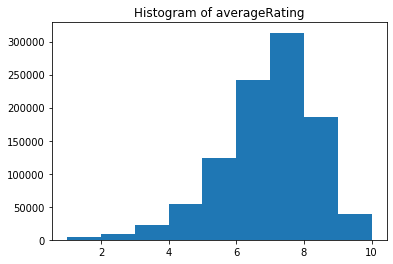

In [0]:
viz_histogram(df_ratings, 'averageRating', 9)

Our ratings range from **1** to **10**. The mean rating is **6.89** (maybe people are a little bit kinder than expected), with a standard deviation of roughly **1.40**. We have roughly **1 million** entries.

## How many votes does a movie have on average? (Box-Plot)

In [0]:
df_ratings.groupBy('tconst').mean('numVotes').describe().show()

+-------+---------+------------------+
summary| tconst| avg(numVotes)|
+-------+---------+------------------+
 count| 993821| 993821|
 mean| null| 955.4982275480193|
 stddev| null|15656.839581234844|
 min|tt0000001| 5.0|
 max|tt9916778| 2160364.0|
+-------+---------+------------------+

In [0]:
quantiles_votes = show_quantiles(df_ratings, 'numVotes', percentiles)

+---------+---------+
Pecentile| numVotes|
+---------+---------+
 0.1| 5.0|
 0.25| 8.0|
 0.5| 19.0|
 0.75| 74.0|
 0.9|2160364.0|
+---------+---------+

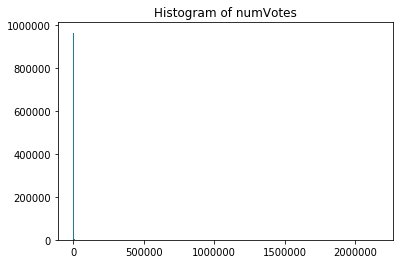

In [0]:
viz_histogram(df_ratings, 'numVotes', 1000)

# Feature Selection & Data Cleaning

In [0]:
df_final = '...'

# Write to S3

In [0]:
# TO DEFINE SHAPE OF TARGET DATASET

# id, rating, [list of features]

# sample of target dataset (e.g. 20%) write to s3

df_final.write('s3')

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-3321533958678319> in <module> 
 5 # sample of target dataset (e.g. 20%) write to s3 
 6 
 ----> 7 df_final . write ( 's3' ) 

 NameError : name 'df_final' is not defined

In [0]:
print('cool')

cool